In [10]:
import keras
from keras.layers import Dense ,Flatten,Dropout,Activation
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [5]:
from keras.utils import to_categorical,np_utils
from keras.datasets import cifar10
from keras.models import Sequential

In [50]:
import numpy as np
# load datasets
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [51]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)
print(X_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 10)


model=Sequential()


In [52]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
								 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [53]:
opt=keras.optimizers.rmsprop(lr=0.001,decay=0.00001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


In [56]:
print(x_train[1])

[[[  9.28752979e-06   1.06746274e-05   1.12777134e-05]
  [  7.59888735e-06   8.26228279e-06   8.20197420e-06]
  [  6.33240597e-06   6.27209738e-06   5.72931958e-06]
  ..., 
  [  5.48808521e-06   5.72931958e-06   4.28191288e-06]
  [  5.24685083e-06   5.42777661e-06   4.28191288e-06]
  [  4.76438208e-06   4.88499927e-06   4.22160429e-06]]

 [[  8.44320857e-06   9.64938135e-06   1.01921587e-05]
  [  8.74475154e-06   9.22722120e-06   9.28752979e-06]
  [  7.53857876e-06   7.53857876e-06   7.11641860e-06]
  ..., 
  [  5.78962863e-06   5.97055441e-06   4.70407349e-06]
  [  4.64376490e-06   4.82469068e-06   3.73913508e-06]
  [  4.28191288e-06   4.40253007e-06   3.67882649e-06]]

 [[  8.44320857e-06   9.34783839e-06   9.89061573e-06]
  [  8.38289998e-06   8.80506013e-06   8.98598682e-06]
  [  6.93549237e-06   6.93549237e-06   6.75456658e-06]
  ..., 
  [  4.76438208e-06   4.94530786e-06   3.85975272e-06]
  [  4.10098710e-06   4.22160429e-06   3.31697470e-06]
  [  4.04067850e-06   4.16129569e-06 

In [57]:
x_train=X_train.astype('float32')
x_test=X_test.astype('float32')
x_train /=255
x_test /=255
print(X_train[1].shape)

(32, 32, 3)


In [58]:
print("training________________________________-")
model.fit(x_train,y_train,batch_size=64,epochs=10)

training________________________________-
Epoch 1/10
24960/50000 [=============>................] - ETA: 2:01 - loss: 2.3030 - acc: 0.1002

KeyboardInterrupt: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 64)        18496     
__________

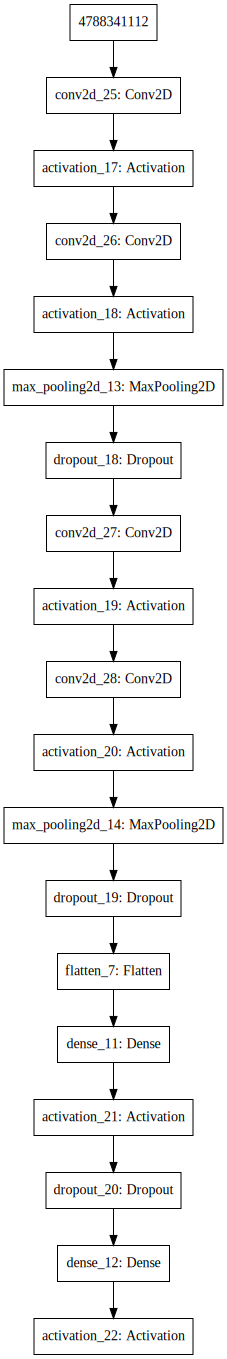

In [59]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from keras.utils import plot_model
model.summary()
plot_model(model,to_file='example.svg')
plot_model(model,to_file='example.png')
lena = mpimg.imread('example.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理Nginx 
lena.shape #(512, 512, 3)
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
# plt.show()
from IPython.display import SVG, display
display(SVG('example.svg'))
